In [62]:
import pandas as pd
import seaborn as sns
import numpy as np
data = pd.read_json('gme.json')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-02-13,2.40625,2.51500,2.38125,2.51250,1.691666,76216000
1,2002-02-14,2.54375,2.54875,2.48125,2.50000,1.683250,11021600
2,2002-02-15,2.50000,2.50625,2.46250,2.48750,1.674834,8389600
3,2002-02-19,2.47500,2.47500,2.34375,2.38750,1.607504,7410400
4,2002-02-20,2.40000,2.46875,2.38125,2.46875,1.662210,6892800


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5600 non-null   datetime64[ns]
 1   Open       5600 non-null   float64       
 2   High       5600 non-null   float64       
 3   Low        5600 non-null   float64       
 4   Close      5600 non-null   float64       
 5   Adj Close  5600 non-null   float64       
 6   Volume     5600 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 306.4 KB


In [28]:
max_data = data[data['High'] == 120.75]
date_info = max_data['Date']
print(date_info)
    

4772   2021-01-28
Name: Date, dtype: datetime64[ns]


In [39]:
count = 0
total = 0
for month in range(1, 13):
    for i in range(len(data)):
        if data.loc[i]["Date"].month == month:
            avg = (data.loc[i]["High"] + data.loc[i]["Low"]) / 2
            total += avg
            count += 1
total/count

9.233137054107122

In [48]:
data[data["High"] == data["High"].max()]

,Date,Open,High,Low,Close,Adj Close,Volume
4772,2021-01-28,66.25,120.75,28.0625,48.400002,48.400002,235263200


In [52]:
data[data["Low"] == data["Low"].min()]
     

,Date,Open,High,Low,Close,Adj Close,Volume
4566,2020-04-03,0.7125,0.735,0.6425,0.7,0.7,15321600


In [40]:
data.loc[0]["Date"].year

2002

In [41]:
data.loc[0]["Date"].day

13

<AxesSubplot:xlabel='Low', ylabel='Volume'>

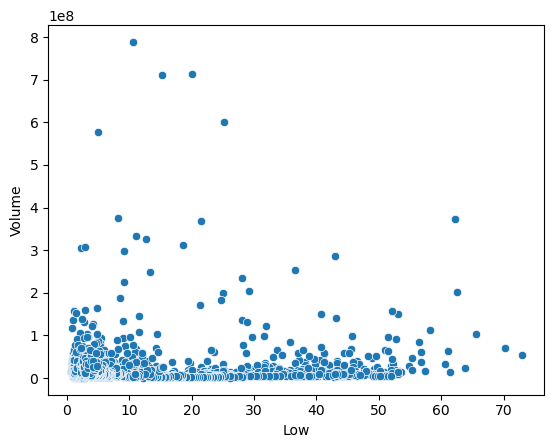

In [47]:
sns.scatterplot(data=data, x='Low', y='Volume')

*** There is no correrlation, the data is highly volotile. The scatterplot of Low vs. Value show no relationship as well. To confirm this,  The pearson Co value is 0.1 which means the direction of the relationship is positive with a weak strength. There is no relationship. 

<AxesSubplot:xlabel='Date', ylabel='High'>

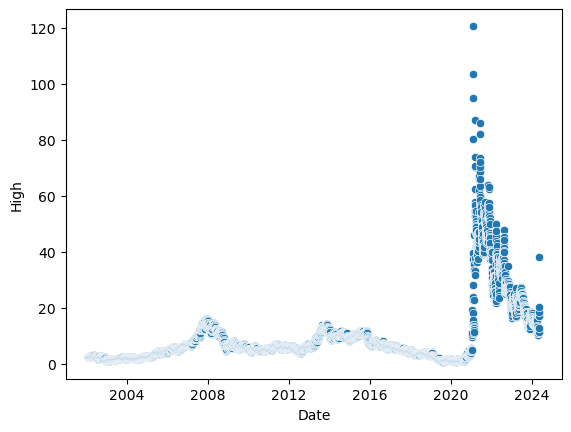

In [54]:
sns.scatterplot(data=data, y='High', x='Date')

<AxesSubplot:xlabel='Date', ylabel='High'>

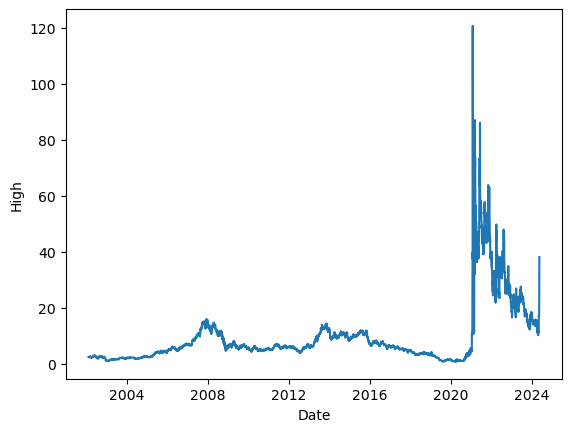

In [60]:
sns.lineplot(data=data, y='High', x='Date')

In [59]:
data['Date_numeric'] = data['Date'].view('int64')
data['High'].corr(data['Date_numeric'])

0.4889959232324393

In [63]:
log_high = np.log(data['High'])

In [64]:
data["log_high"] = log_high

<AxesSubplot:xlabel='Date', ylabel='log_high'>

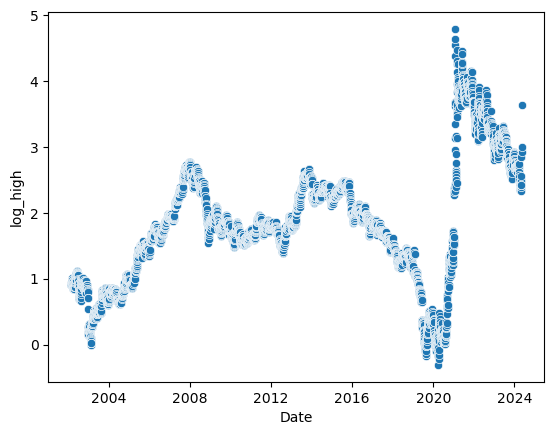

In [66]:
sns.scatterplot(data=data, y='log_high', x='Date')